In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Heart Disease.csv')

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        class_counts = df[col].value_counts()
        print(f"Class counts for column '{col}':\n{class_counts}\n")

Class counts for column 'HeartDisease':
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

Class counts for column 'Smoking':
Smoking
No     187887
Yes    131908
Name: count, dtype: int64

Class counts for column 'AlcoholDrinking':
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

Class counts for column 'Stroke':
Stroke
No     307726
Yes     12069
Name: count, dtype: int64

Class counts for column 'DiffWalking':
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64

Class counts for column 'Sex':
Sex
Female    167805
Male      151990
Name: count, dtype: int64

Class counts for column 'AgeCategory':
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

Class counts for column 'Race':

# Plotting them and Visualize after UnderSampling

In [6]:
xVisual = df.drop('HeartDisease',axis = 1)
yVisual = df[['HeartDisease']]

In [7]:
UnderSampling = RandomUnderSampler(sampling_strategy='auto', random_state=42)
xVisual,yVisual = UnderSampling.fit_resample(xVisual,yVisual)

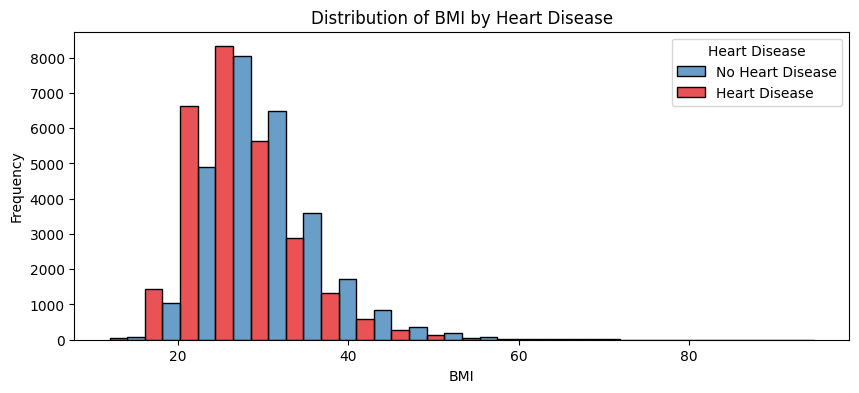

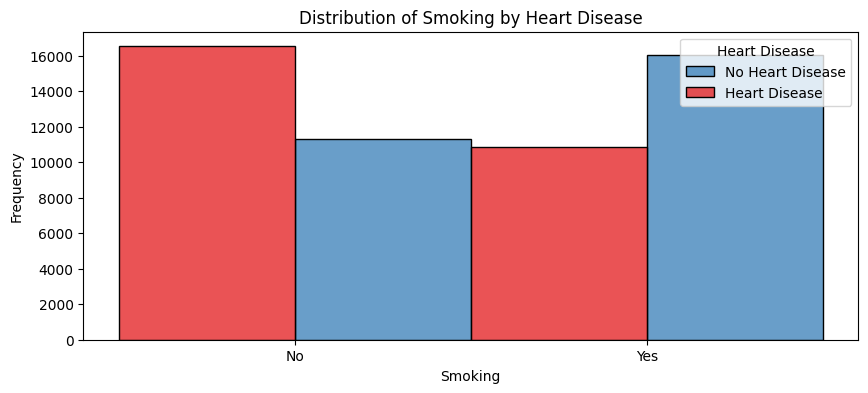

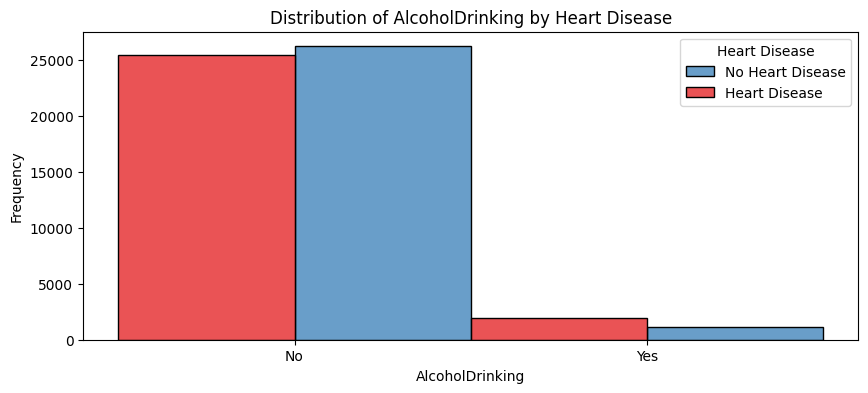

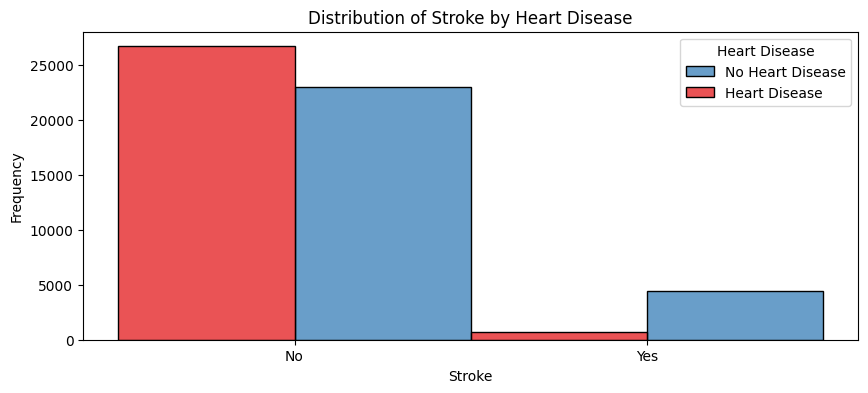

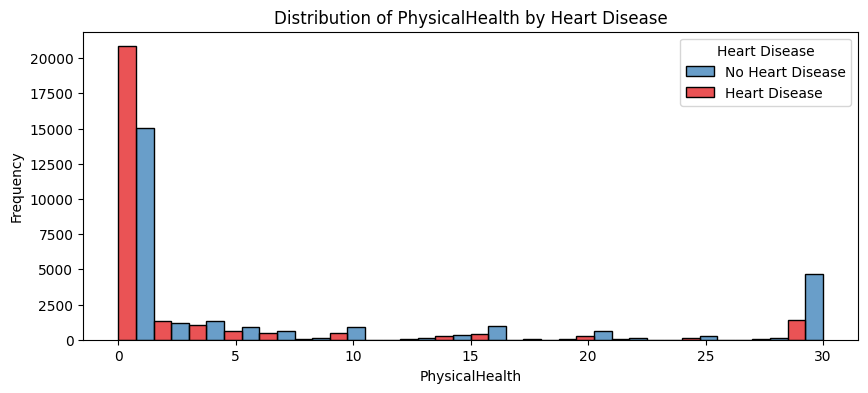

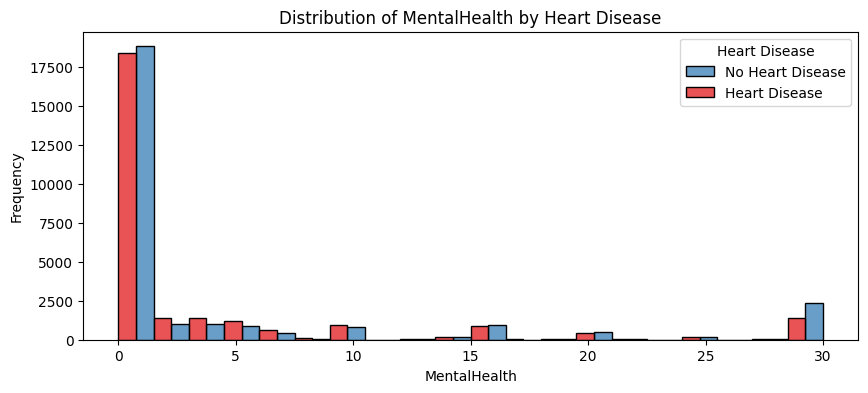

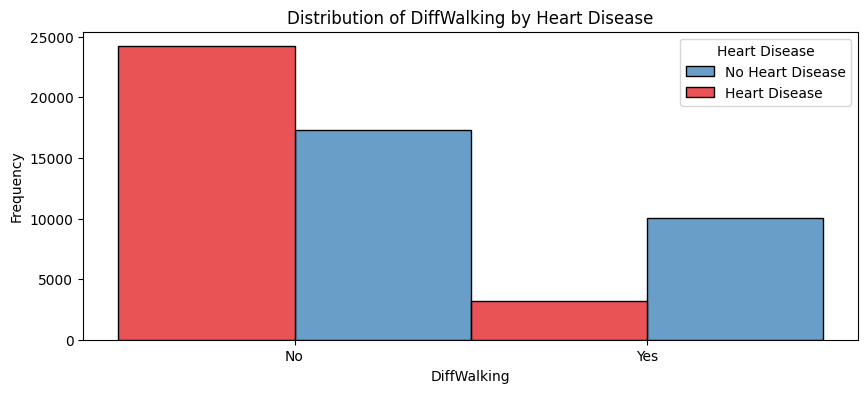

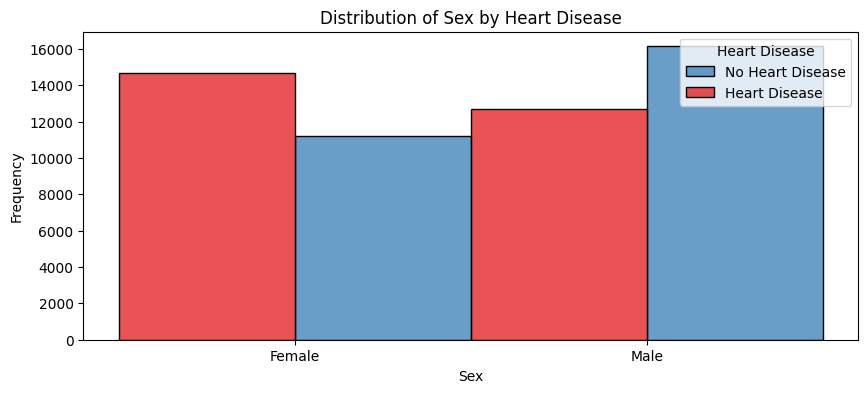

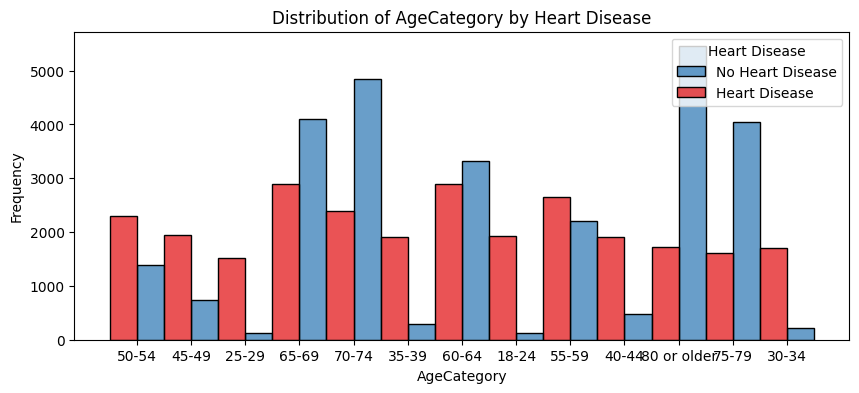

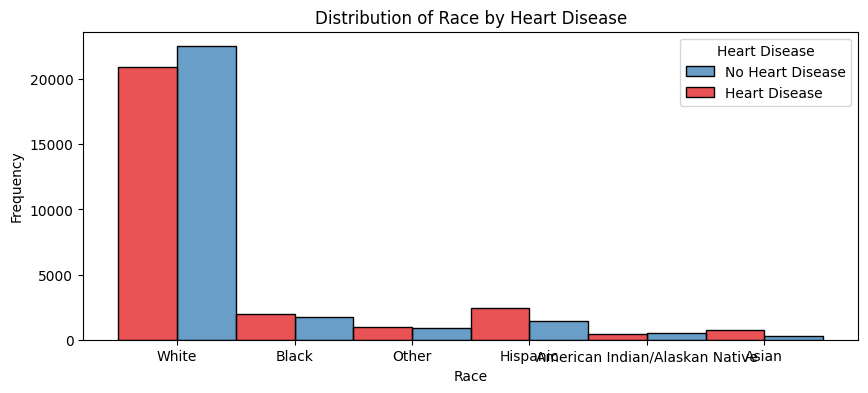

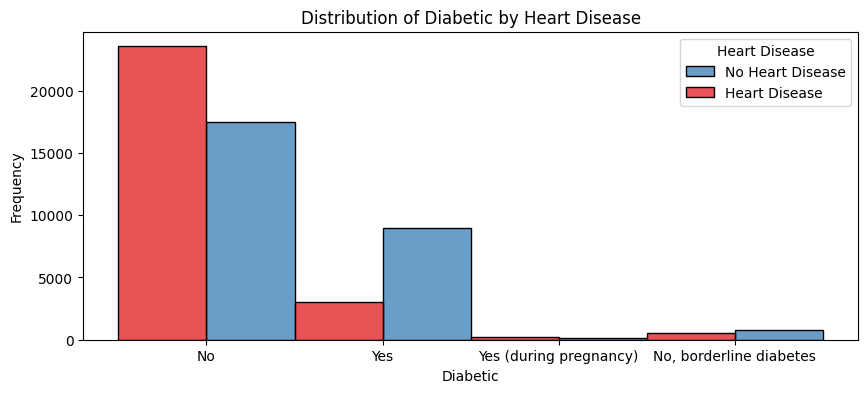

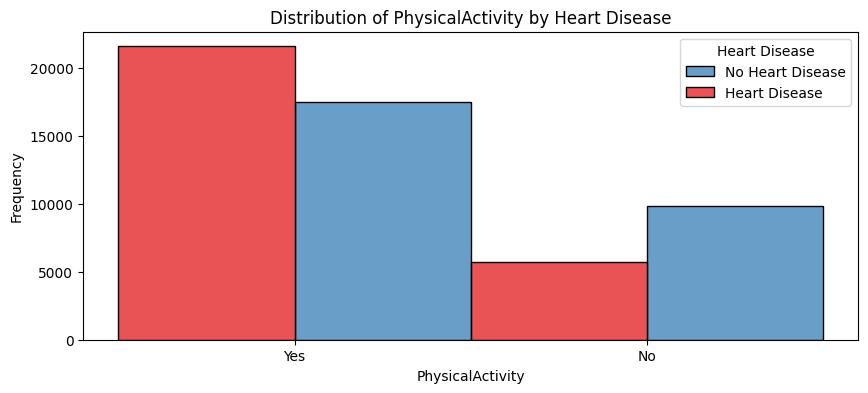

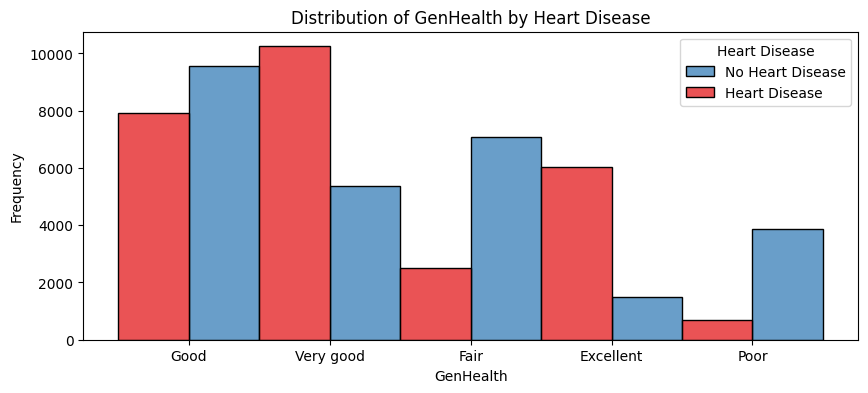

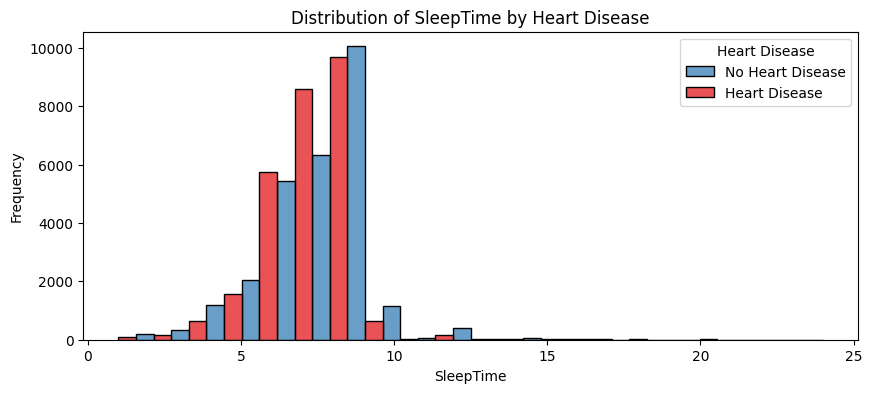

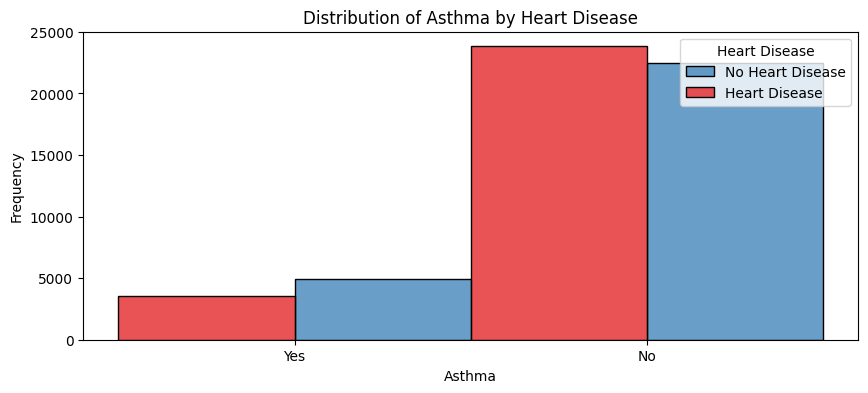

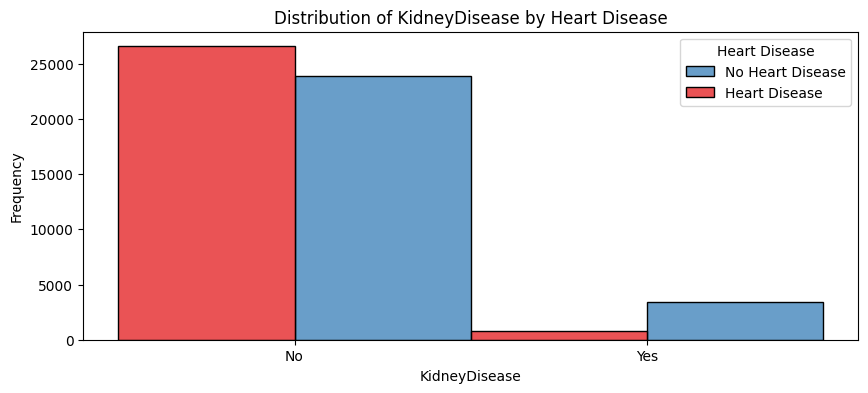

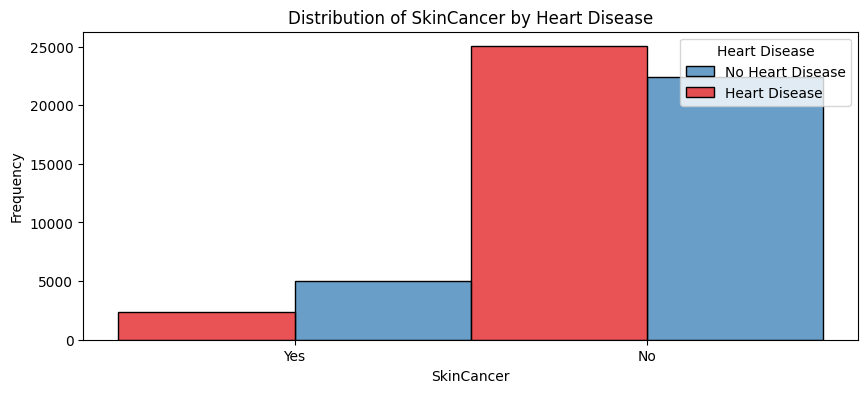

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate features and target variable for visualization
data_visualization = pd.concat([xVisual, yVisual], axis=1)

# Loop through features and create separate bar plots for each feature
for feature in xVisual.columns:
    plt.figure(figsize=(10, 4))
    
    sns.histplot(data=data_visualization, x=feature, hue='HeartDisease', multiple='dodge', bins=20, palette='Set1')
    
    plt.title(f'Distribution of {feature} by Heart Disease')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Manually set labels for the legend
    legend_labels = ['No Heart Disease', 'Heart Disease']
    plt.legend(labels=legend_labels, title='Heart Disease', loc='upper right')
    
    plt.show()


In [9]:
for col in xVisual.columns:
    if xVisual[col].dtype == 'object':
        class_counts = xVisual[col].value_counts()
        print(f"Class counts for column '{col}':\n{class_counts}\n")

Class counts for column 'Smoking':
Smoking
No     27863
Yes    26883
Name: count, dtype: int64

Class counts for column 'AlcoholDrinking':
AlcoholDrinking
No     51680
Yes     3066
Name: count, dtype: int64

Class counts for column 'Stroke':
Stroke
No     49642
Yes     5104
Name: count, dtype: int64

Class counts for column 'DiffWalking':
DiffWalking
No     41551
Yes    13195
Name: count, dtype: int64

Class counts for column 'Sex':
Sex
Male      28858
Female    25888
Name: count, dtype: int64

Class counts for column 'AgeCategory':
AgeCategory
70-74          7242
80 or older    7170
65-69          6987
60-64          6222
75-79          5667
55-59          4856
50-54          3672
45-49          2697
40-44          2389
35-39          2200
18-24          2051
30-34          1933
25-29          1660
Name: count, dtype: int64

Class counts for column 'Race':
Race
White                             43401
Hispanic                           3868
Black                              3683
Other

# Encoding 

In [10]:
one_hot = OneHotEncoder()
ordinal = OrdinalEncoder()
scaler = StandardScaler()

# Loop through columns and apply preprocessing
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        
        # Use one-hot encoding for columns with more than 2 unique values
        if unique_values > 2:
            dummies = pd.get_dummies(df[col],drop_first=True, prefix='One_Hot_'+'_'+str(col))
            df.drop(df[[col]], axis=1,inplace=True)
            df=pd.concat([df,dummies],axis=1)
        
        # Use ordinal encoding for binary categorical columns
        elif unique_values == 2:
            df[col] = ordinal.fit_transform(df[[col]])
    else:
        # Use StandardScaler for numeric columns
        df[col] = scaler.fit_transform(df[[col]])


# Split the dataset

In [11]:
x = df.drop('HeartDisease',axis = 1)
y = df[['HeartDisease']]

In [12]:
xtrain,xtest,ytrain,ytest = tts(x,y, test_size = 0.2,random_state = 42)

# Declaring some varibales to store accuracy and model name for all cases

In [13]:
Model_Names = []
Accuracy_Scores = []

# Train and Test using different model and Generate Classification report for xtrain and ytrain

In [14]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42), 
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
}

# Loop through classifiers and evaluate them
for model_name, model in classifiers.items():
    model.fit(xtrain, ytrain)  
    y_pred = model.predict(xtest)  

    # Storing model names and Accuracy
    result = classification_report(ytest, y_pred, output_dict = True)
    Model_Names.append(model_name)
    Accuracy_Scores.append(result['accuracy'])

    # Display the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(ytest, y_pred))
    print("=" * 60,'\n')  

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     58367
         1.0       0.54      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     58367
         1.0       0.34      0.12      0.18      5592

    accuracy                           0.90     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58367
         1.0       0.21      0.79      0.33      5592

    accuracy                           0.7

# UnderSampling 

In [15]:
UnderSampling = RandomUnderSampler(sampling_strategy='auto', random_state=42)
xtrain_UnderSample,ytrain_UnderSample = UnderSampling.fit_resample(xtrain,ytrain)

# Train and Test using different model and Generate Classification report for Undersampling

In [16]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42), 
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
}

# Loop through classifiers and evaluate them
for model_name, model in classifiers.items():
    model.fit(xtrain_UnderSample, ytrain_UnderSample)  
    y_pred = model.predict(xtest)  

    # Storing model names and Accuracy
    result = classification_report(ytest, y_pred, output_dict = True)
    Model_Names.append('Under Sampled'+ model_name)
    Accuracy_Scores.append(result['accuracy'])

    # Display the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(ytest, y_pred))
    print("=" * 60,'\n')  

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84     58367
         1.0       0.23      0.78      0.35      5592

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58367
         1.0       0.20      0.76      0.32      5592

    accuracy                           0.72     63959
   macro avg       0.59      0.74      0.57     63959
weighted avg       0.90      0.72      0.78     63959


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58367
         1.0       0.20      0.75      0.32      5592

    accuracy                           0.7

# OverSampling ADASYN

In [20]:
from imblearn.over_sampling import ADASYN

In [21]:
# Initialize ADASYN 
adasyn = ADASYN(random_state=42)

In [22]:
# Apply ADASYN to the training data
xtrain_oversampled, ytrain_oversampled = adasyn.fit_resample(xtrain, ytrain)

# Train and Test using different model and Generate Classification report for Oversampling

In [23]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42), 
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
}

# Loop through classifiers and evaluate them
for model_name, model in classifiers.items():
    model.fit(xtrain_oversampled, ytrain_oversampled)  
    y_pred = model.predict(xtest)  

    # Storing model names and Accuracy
    result = classification_report(ytest, y_pred, output_dict = True)
    Model_Names.append('Over Sampled'+ model_name)
    Accuracy_Scores.append(result['accuracy'])

    # Display the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(ytest, y_pred))
    print("=" * 60,'\n') 

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.85     58367
         1.0       0.23      0.72      0.35      5592

    accuracy                           0.76     63959
   macro avg       0.60      0.74      0.60     63959
weighted avg       0.90      0.76      0.81     63959


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     58367
         1.0       0.26      0.24      0.25      5592

    accuracy                           0.87     63959
   macro avg       0.60      0.59      0.59     63959
weighted avg       0.87      0.87      0.87     63959


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     58367
         1.0       0.26      0.25      0.26      5592

    accuracy                           0.8

# Applying SVM 

In [24]:
svm = SVC(kernel='linear', C=1.0)

**Before Undersampling**

In [25]:
svm.fit(xtrain,ytrain)
ypred_svm = svm.predict(xtest)

# Storing model names and Accuracy
result = classification_report(ytest, ypred_svm, output_dict = True)
Model_Names.append('SVM')
Accuracy_Scores.append(result['accuracy'])

print("Classification Report:\n")
print(classification_report(ytest, ypred_svm))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     58367
         1.0       0.00      0.00      0.00      5592

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959



**After Undersampling**

In [26]:
svm.fit(xtrain_UnderSample,ytrain_UnderSample)
ypred_svm = svm.predict(xtest)

# Storing model names and Accuracy
result = classification_report(ytest, ypred_svm, output_dict = True)
Model_Names.append('Under Sampled SVM')
Accuracy_Scores.append(result['accuracy'])

print("Classification Report:\n")
print(classification_report(ytest, ypred_svm))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     58367
         1.0       0.22      0.79      0.35      5592

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959



**After Oversampling using ADASYN**

In [27]:
svm.fit(xtrain_oversampled, ytrain_oversampled)
ypred_svm = svm.predict(xtest)

# Storing model names and Accuracy
result = classification_report(ytest, ypred_svm, output_dict = True)
Model_Names.append('Over Sampled SVM')
Accuracy_Scores.append(result['accuracy'])

print("Classification Report:\n")
print(classification_report(ytest, ypred_svm))


Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     58367
         1.0       0.22      0.73      0.34      5592

    accuracy                           0.75     63959
   macro avg       0.59      0.74      0.59     63959
weighted avg       0.90      0.75      0.80     63959



# Visualize the Accuracy Scores of Different Models 

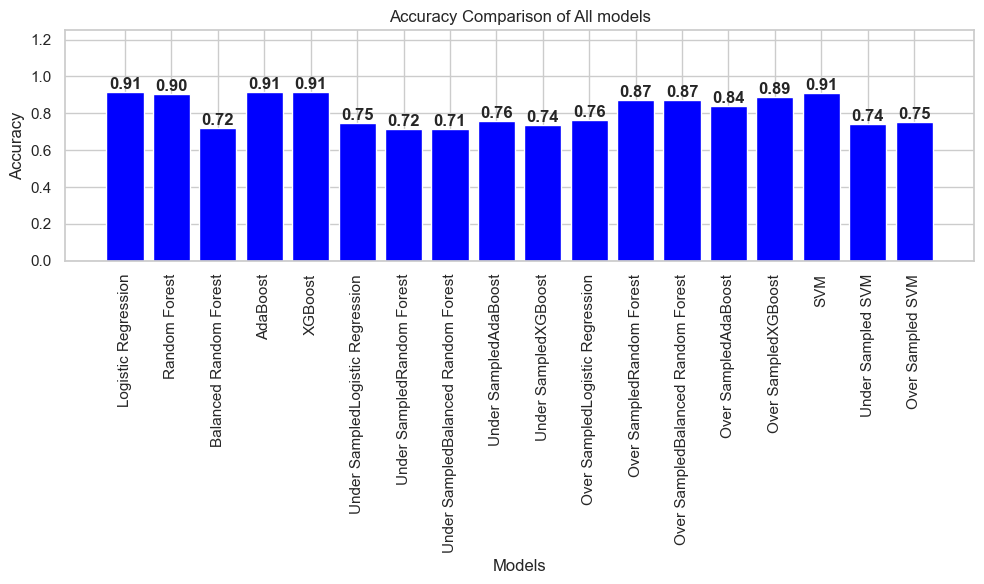

In [33]:
# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
plt.bar(Model_Names, Accuracy_Scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All models')
plt.ylim(0, 1.25) #set limit of y to 1.25 becasuse our Accuracy limit is [0-1]

plt.xticks(rotation=90)
# Add labels to the bars
for i, score in enumerate(Accuracy_Scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom', fontweight= 'bold')
    
plt.tight_layout()
plt.show()


In [31]:
Model_Names

['Logistic Regression',
 'Random Forest',
 'Balanced Random Forest',
 'AdaBoost',
 'XGBoost',
 'Under SampledLogistic Regression',
 'Under SampledRandom Forest',
 'Under SampledBalanced Random Forest',
 'Under SampledAdaBoost',
 'Under SampledXGBoost',
 'Over SampledLogistic Regression',
 'Over SampledRandom Forest',
 'Over SampledBalanced Random Forest',
 'Over SampledAdaBoost',
 'Over SampledXGBoost',
 'SVM',
 'Under Sampled SVM',
 'Over Sampled SVM']